In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import locale
import scipy.stats as stats

source: https://github.com/sarahshelden/Project1DataScience

In [2]:
# read the raw csv file(/s)
movie_file = ("../data/movies_metadata.csv")

In [3]:
#read the movie file and create a dataframe

movie_data_df = pd.read_csv(movie_file)

#list the column types
movie_data_df.head().T


/usr/local/Caskroom/miniconda/base/envs/jupyter-refactoring/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4
adult,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [4]:
#cleanup and filter steps ( budget, revenue , release year)

movie_data_df = movie_data_df.drop(columns=['adult', 'production_countries','belongs_to_collection','homepage','id','imdb_id','overview','poster_path','runtime','spoken_languages','tagline','original_title','video'])

print( f'Inital count of data from file: {len(movie_data_df)}')
original_movie_data_cnt = len(movie_data_df)
                      
clean_movie_data_df = movie_data_df.loc[movie_data_df["budget"] != 0  ]
print( f'count after filtering out $0 budget: {len(clean_movie_data_df)}')

clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["revenue"] != 0  ]
print( f'count after filtering out $0 revenue: {len(clean_movie_data_df)}')

clean_movie_data_df['release_year']= pd.to_datetime(clean_movie_data_df["release_date"]).dt.year 
clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["release_year"] < 2019 ]
print( f'count after filtering out movies in future date: {len(clean_movie_data_df)}')

clean_movie_data_df['net_loss_profit'] = clean_movie_data_df["revenue"] - clean_movie_data_df["budget"]



Inital count of data from file: 45291
count after filtering out $0 budget: 8886
count after filtering out $0 revenue: 5381
count after filtering out movies in future date: 5364


In [5]:
# extract the Genre from the column that has a list of dictionaries
clean_movie_data_df['Primary Genre']=[json.loads(row.genres.replace("'",'"'))[0]['name'] if row.genres != '[]' else '' for _,row in clean_movie_data_df.iterrows()]
clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df['Primary Genre']!= ""]
#print(clean_movie_data_df[['revenue','net_loss_profit','Primary Genre', 'release_year', 'title', 'popularity']])
clean_movie_data_cnt = len(clean_movie_data_df)
print (clean_movie_data_cnt)


5352


In [6]:
# convert number columns: revenue, budget, net_loss_profit to numeric for sorting purposes
clean_movie_data_df['revenue'] = pd.to_numeric(clean_movie_data_df['revenue'])
clean_movie_data_df['budget'] = pd.to_numeric(clean_movie_data_df['budget'])
clean_movie_data_df['net_loss_profit'] = pd.to_numeric(clean_movie_data_df['net_loss_profit'])
clean_movie_data_df['popularity'] = pd.to_numeric(clean_movie_data_df['popularity'])


# sorting movie by revenue from highest to lowest
sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)

# sorting movie by net profit from highest to lowest
sort_by_netProfit = clean_movie_data_df.sort_values(by='net_loss_profit', ascending = False)

# output csv file sort by revenue data
sort_by_revenue.to_csv("revenue.csv", encoding='utf-8')

# output csv file sort by net profit
sort_by_netProfit.to_csv("net_profit_loss.csv", encoding='utf-8')



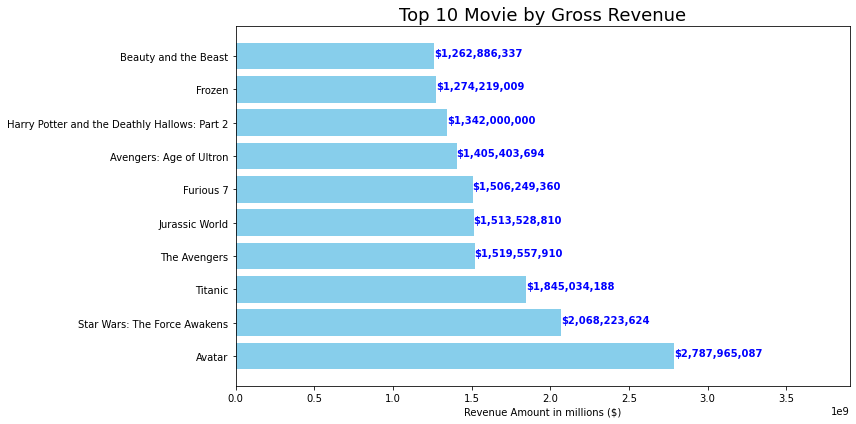

In [7]:
#plot the top 10 movies by revenue

# get the data for plotting the top 10 movies by revenue
top_10_revenue_mv = sort_by_revenue[:10][['title','revenue','Primary Genre']].reset_index()
#print(top_10_revenue_mv)

revenue_value = top_10_revenue_mv.revenue
x_title_labels = top_10_revenue_mv.title

y_rev_pos = np.arange(len(x_title_labels))

plt.figure(figsize=(12,6))
plt.barh(y_rev_pos, revenue_value, align='center', height=0.8, color="skyblue")
plt.yticks(y_rev_pos, x_title_labels)
plt.xlim(0,np.max(revenue_value)*1.4)
plt.xlabel('Revenue Amount in millions ($)')
plt.title('Top 10 Movie by Gross Revenue', fontsize = 18)

for i, v in enumerate(revenue_value):
    plt.text(v + 0.5, i, str(('${:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()


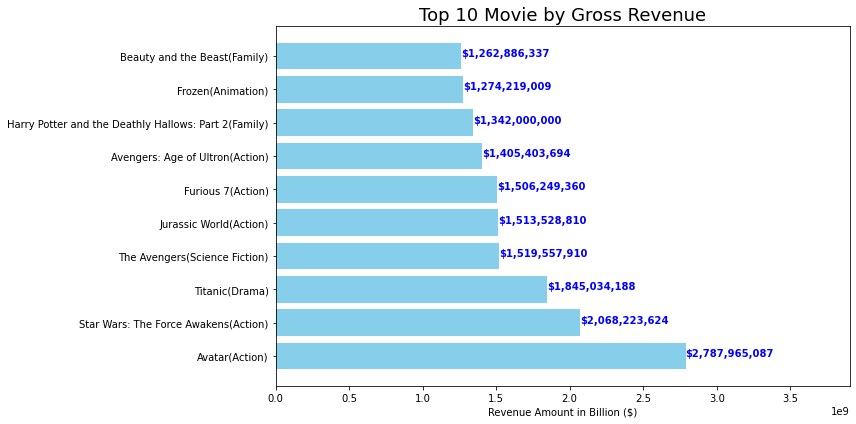

In [8]:
top_10_genre = (top_10_revenue_mv["Primary Genre"])
revenue_value = top_10_revenue_mv.revenue
x_title_labels = top_10_revenue_mv.title
x_title_genre = x_title_labels + "(" + top_10_genre +  ")"

y_rev_pos = np.arange(len(x_title_labels))

plt.figure(figsize=(12,6))
plt.barh(y_rev_pos, revenue_value, align='center', height=0.8, color="skyblue")
plt.yticks(y_rev_pos, x_title_genre)
plt.xlim(0,np.max(revenue_value)*1.4)
plt.xlabel('Revenue Amount in Billion ($)')
plt.title('Top 10 Movie by Gross Revenue', fontsize = 18)

for i, v in enumerate(revenue_value):
   plt.text(v + 0.5, i, str(('${:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
# create data with only title and primary genre
reduced_data_genre_df = sort_by_revenue[["title", "Primary Genre"]]

reduced_data_genre_df.replace("", "<no genre>", inplace = True)

# get different genre counts
genre_counts = reduced_data_genre_df["Primary Genre"].value_counts()

# Convert the genre_counts Series into a DataFrame
genre_counts_df = pd.DataFrame(genre_counts)

# chisquare changes  start
observed_genre_counts_df = genre_counts_df.copy()

observed_genre_counts_df['Primary Genre'] = observed_genre_counts_df['Primary Genre'] / clean_movie_data_cnt

observed_genre_counts_df[1] = 268 / clean_movie_data_cnt
observed_genre_counts_df.columns = ["observed" ,"obs_exp"]
# chisquare changes  end 

# Add a column Percentage of Players to the DataFrame and calculate the percentage
genre_counts_df["Percentage_of_Genre"] = ((genre_counts_df["Primary Genre"]/reduced_data_genre_df["Primary Genre"].count())*100).round(2).astype(str) + "%"

#genre_counts_df

/usr/local/Caskroom/miniconda/base/envs/jupyter-refactoring/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


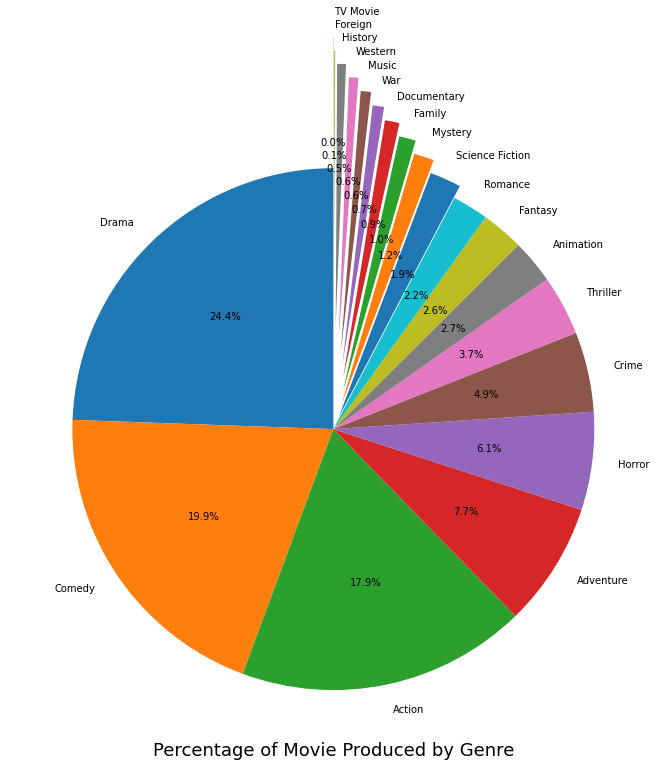

In [10]:
# pie plot to display the percentage of movies produced by Genre
title_list = reduced_data_genre_df["Primary Genre"].value_counts().index.tolist()
value_list = (((genre_counts_df["Primary Genre"]/reduced_data_genre_df["Primary Genre"].count())*100).round(2)).tolist()

fig1, ax1 = plt.subplots(figsize=(15,12))

explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
           0.05, 0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5)
ax1.pie(value_list, labels=title_list, explode = explode, autopct='%1.1f%%',
        startangle=90)


plt.title("Percentage of Movie Produced by Genre", y=-0.01, fontsize = 18)

plt.show()


In [11]:
#df=sort_by_revenue.drop(columns=['budget', 'genres', 'original_language', 'production_companies', 'release_date', 'status', 'release_year', 'popularity', 'vote_average', 'vote_count','net_loss_profit'])
df= sort_by_revenue[['title', 'Primary Genre', 'revenue']]
#df

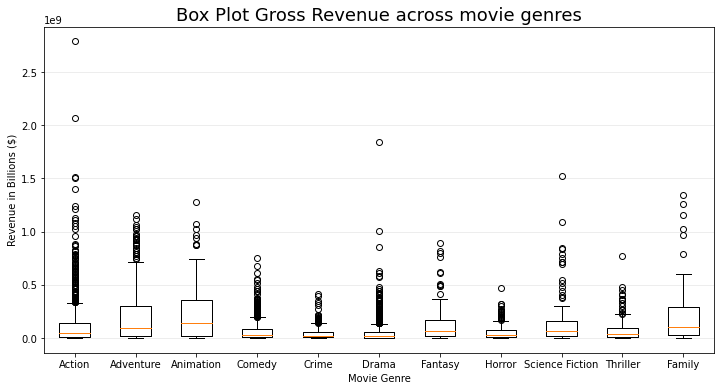

In [12]:
#box plot 

value_action = df.loc[df['Primary Genre'] == 'Action', 'revenue'].tolist()
value_animation = df.loc[df['Primary Genre'] == 'Animation', 'revenue'].tolist()
value_adventure = df.loc[df['Primary Genre'] == 'Adventure', 'revenue'].tolist()
value_comedy = df.loc[df['Primary Genre'] == 'Comedy', 'revenue'].tolist()
value_crime = df.loc[df['Primary Genre'] == 'Crime', 'revenue'].tolist()
value_drama = df.loc[df['Primary Genre'] == 'Drama', 'revenue'].tolist()
value_fantasy = df.loc[df['Primary Genre'] == 'Fantasy', 'revenue'].tolist()
value_horror = df.loc[df['Primary Genre'] == 'Horror', 'revenue'].tolist()
value_science_fiction = df.loc[df['Primary Genre'] == 'Science Fiction', 'revenue'].tolist()
value_thriller = df.loc[df['Primary Genre'] == 'Thriller', 'revenue'].tolist()
value_family = df.loc[df['Primary Genre'] == 'Family', 'revenue'].tolist()


fig, ax1 = plt.subplots(figsize=(12, 6))

box_plot_data=[value_action, value_adventure, value_animation, value_comedy, value_crime,
               value_drama, value_fantasy, value_horror, value_science_fiction, value_thriller,value_family]

#box_plot_data=[value_action, value_animation]
plt.boxplot(box_plot_data)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11], ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                                             'Drama', 'Fantasy', 'Horror', 'Science Fiction', 'Thriller','Family'])

# Add a horizontal grid to the plot, but make it very light in color
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

ax1.set_title('Box Plot Gross Revenue across movie genres', fontsize = 18)
ax1.set_xlabel('Movie Genre')
ax1.set_ylabel('Revenue in Billions ($)')

plt.show()


In [13]:

print(df.groupby('Primary Genre').describe().T)


Primary Genre        Action     Adventure     Animation        Comedy  \
revenue count  9.600000e+02  4.120000e+02  1.460000e+02  1.066000e+03   
        mean   1.232155e+08  2.006484e+08  2.408561e+08  6.410397e+07   
        std    2.224891e+08  2.566323e+08  2.703053e+08  9.038771e+07   
        min    3.000000e+00  3.000000e+00  7.370600e+04  4.000000e+00   
        25%    1.170458e+07  1.789226e+07  2.325000e+07  7.417020e+06   
        50%    4.511827e+07  9.483515e+07  1.401684e+08  2.995810e+07   
        75%    1.409277e+08  3.013673e+08  3.573437e+08  8.457629e+07   
        max    2.787965e+09  1.153304e+09  1.274219e+09  7.526009e+08   

Primary Genre         Crime   Documentary         Drama        Family  \
revenue count  2.650000e+02  4.800000e+01  1.308000e+03  5.500000e+01   
        mean   4.939538e+07  1.564947e+07  5.165618e+07  2.406010e+08   
        std    6.890931e+07  2.883124e+07  1.000791e+08  3.371376e+08   
        min    3.000000e+00  2.900000e+01  1.00000

## One - Way ANOVA tests
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
The resulting pvalue was less than 0.05. We can reject the null hypothesis and conclude that there is a significant difference between gross revenue for each movie genre. Even though we have obtained a very low p-value, we cannot make any assumptions about the magnitude of the effect. 

In [14]:

stats.f_oneway(value_action, value_adventure, value_animation, value_comedy, value_crime,
               value_drama, value_fantasy, value_horror, value_science_fiction, value_thriller,value_family)

F_onewayResult(statistic=57.94670912992872, pvalue=1.846700988098159e-111)

In [15]:
stats.f_oneway(value_action, value_family)

F_onewayResult(statistic=13.544534537401107, pvalue=0.00024524769562533607)

In [16]:
stats.f_oneway(value_family, value_adventure)

F_onewayResult(statistic=1.0845915910970994, pvalue=0.2982138116014794)

Text(0, 0.5, 'Average Popularity')

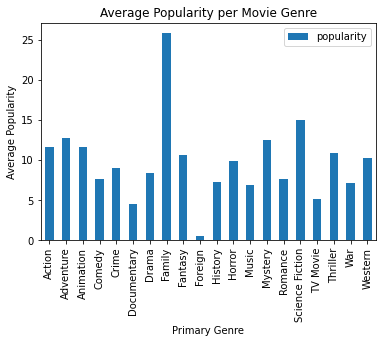

In [17]:
sort_by_revenue.replace("", "<no genre>", inplace = True)
df1 = sort_by_revenue[['title', 'Primary Genre', 'popularity']].groupby('Primary Genre').mean()


#plt.figure(figsize=(20, 10))
ax = df1.plot(kind='bar')
ax.set_title('Average Popularity per Movie Genre')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Average Popularity')





In [18]:
sort_by_netProfit.groupby("Primary Genre")
sort_by_netProfit

,budget,genres,original_language,popularity,production_companies,release_date,revenue,status,title,vote_average,vote_count,release_year,net_loss_profit,Primary Genre
14528,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,185.070892,"[{'name': 'Ingenious Film Partners', 'id': 289...",12/10/2009,2.787965e+09,Released,Avatar,7.2,12114.0,2009,2.550965e+09,Action
26484,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,31.626013,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...",12/15/2015,2.068224e+09,Released,Star Wars: The Force Awakens,7.5,7993.0,2015,1.823224e+09,Action
1637,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,26.889070,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",11/18/1997,1.845034e+09,Released,Titanic,7.5,7770.0,1997,1.645034e+09,Drama
25016,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,32.790475,"[{'name': 'Universal Studios', 'id': 13}, {'na...",6/9/2015,1.513529e+09,Released,Jurassic World,6.5,8842.0,2015,1.363529e+09,Action
28754,190000000,"[{'id': 28, 'name': 'Action'}]",en,27.275687,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",4/1/2015,1.506249e+09,Released,Furious 7,7.3,4253.0,2015,1.316249e+09,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,160000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,10.308026,"[{'name': 'Touchstone Pictures', 'id': 9195}]",8/27/1999,6.169890e+07,Released,The 13th Warrior,6.4,524.0,1999,-9.830110e+07,Adventure
44175,197471676,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",en,15.262706,"[{'name': 'EuropaCorp', 'id': 6896}]",7/20/2017,9.002429e+07,Released,Valerian and the City of a Thousand Planets,6.7,905.0,2017,-1.074474e+08,Adventure
16757,150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",en,7.247170,"[{'name': 'Walt Disney Animation Studios', 'id...",3/9/2011,3.899276e+07,Released,Mars Needs Moms,5.6,202.0,2011,-1.110072e+08,Adventure
7220,145000000,"[{'id': 37, 'name': 'Western'}, {'id': 36, 'na...",en,12.240901,"[{'name': 'Imagine Entertainment', 'id': 23}, ...",4/7/2004,2.581996e+07,Released,The Alamo,5.8,108.0,2004,-1.191800e+08,Western


In [19]:
sort_by_netProfit.describe()

,budget,popularity,revenue,vote_average,vote_count,release_year,net_loss_profit
count,5.352000e+03,5352.000000,5.352000e+03,5352.000000,5352.000000,5352.000000,5.352000e+03
mean,3.123683e+07,9.817074,9.076505e+07,6.273655,735.906203,2000.074925,5.952822e+07
std,4.020575e+07,13.841559,1.664726e+08,0.918721,1253.896093,15.216502,1.398380e+08
min,1.000000e+00,0.000001,1.000000e+00,0.000000,0.000000,1930.000000,-1.657101e+08
25%,5.500000e+06,5.499605,7.197850e+06,5.700000,79.000000,1994.000000,-1.502190e+06
50%,1.700000e+07,8.412657,3.003770e+07,6.300000,278.000000,2004.000000,1.120832e+07
75%,4.000000e+07,11.740371,1.000050e+08,6.900000,807.250000,2011.000000,6.305496e+07
max,3.800000e+08,547.488298,2.787965e+09,9.100000,14075.000000,2018.000000,2.550965e+09


# Popularity related plots

In [20]:
#votes to primary genre - hasan
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_vote_count = clean_movie_data_df.sort_values(by='vote_count', ascending = False)

# output csv file sort by revenue data
#sort_by_vote_count.to_csv("vote_count_loss.csv", encoding='utf-8')

# print to terminal
sort_by_vote_count.head()

top_10_profitable_mv = sort_by_vote_count[:10][['title','vote_count','Primary Genre']].reset_index()

#print(top_10_profitable_mv)

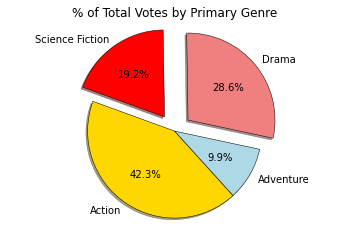

In [21]:
vote_count_sum = top_10_profitable_mv.groupby('Primary Genre').sum()["vote_count"]

labels = vote_count_sum.index
colors = ["gold", "lightblue", "lightcoral","red"]
explode = (0, 0, 0.2,0.2)

plt.title('% of Total Votes by Primary Genre')
plt.axis('equal')

plt.pie(vote_count_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()

In [22]:
#votes to primary genre - hasan
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_popularity = clean_movie_data_df.sort_values(by='popularity', ascending = False)

# output csv file sort by revenue data
#sort_by_vote_count.to_csv("vote_count_loss.csv", encoding='utf-8')

# print to terminal
sort_by_popularity.head()

top_10_popular_mv = sort_by_popularity[:10][['title','popularity','Primary Genre']].reset_index()

#print(top_10_popular_mv)

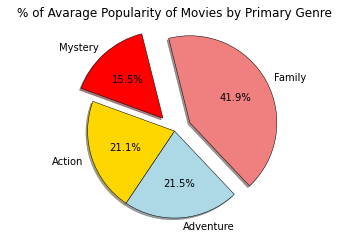

In [23]:
popularity_mean = top_10_popular_mv.groupby('Primary Genre').mean()["popularity"]

labels = popularity_mean.index
colors = ["gold", "lightblue", "lightcoral","red"]
explode = (0, 0, 0.2,0.2)

plt.title('% of Avarage Popularity of Movies by Primary Genre')
plt.axis('equal')

plt.pie(popularity_mean, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()

In [24]:
# sorting movie by revenue from highest to lowest
# sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)
sort_by_popularity = clean_movie_data_df.sort_values(by='popularity', ascending = False)

# output csv file sort by revenue data
#sort_by_popularity.to_csv("popularity.csv", encoding='utf-8')

# print to terminal
sort_by_popularity.head()

popular_mv = sort_by_popularity[: :][['title','revenue','Primary Genre','popularity']].reset_index()



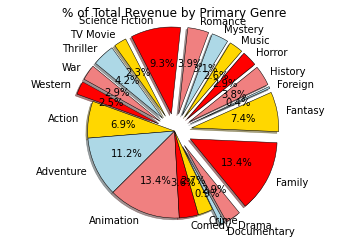

In [25]:
revenue_sum = popular_mv.groupby('Primary Genre').mean()["revenue"]

labels = revenue_sum.index
colors = ["gold", "lightblue", "lightcoral","red"]
explode = (0,0,0,0,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2 )

plt.title('% of Total Revenue by Primary Genre')
plt.axis('equal')

plt.pie(revenue_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160,wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.show()

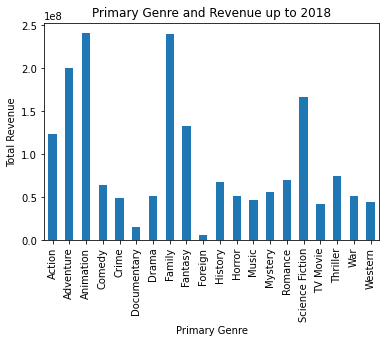

<Figure size 432x288 with 0 Axes>

In [26]:
# bar graph

ax = revenue_sum.plot.bar(x='Primary Genre', y='revenue', rot = 90)

x_axis = np.arange(len(revenue_sum))

tick_locations = [value for value in x_axis]

ax.set_title('Primary Genre and Revenue up to 2018')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Total Revenue')

plt.show()
plt.tight_layout()

### bar graph
popularity_mean =popular_mv.groupby('Primary Genre').mean()["popularity"]

ax = popularity_mean.plot.bar(x='Primary Genre', y='popularity', rot = 90)

x_axis = np.arange(len(popularity_mean))

tick_locations = [value for value in x_axis]

ax.set_title('Primary Genre and Average Popularity of Movies up to 2018')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Avarage Popularity')



plt.show()
plt.tight_layout()

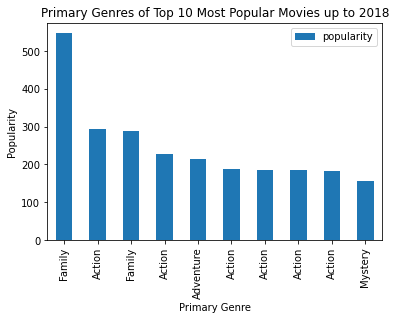

<Figure size 432x288 with 0 Axes>

In [27]:
# bar graph

ax = top_10_popular_mv.plot.bar(x='Primary Genre', y='popularity', rot = 90)

x_axis = np.arange(len(top_10_popular_mv))

tick_locations = [value for value in x_axis]

ax.set_title('Primary Genres of Top 10 Most Popular Movies up to 2018')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Popularity')




plt.show()
plt.tight_layout()

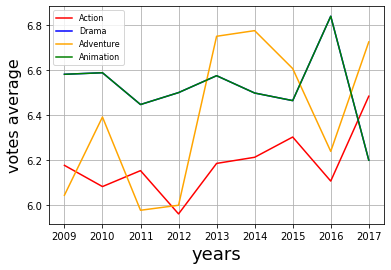

In [28]:
#votes average graphs
line_df= sort_by_revenue[['release_year', 'Primary Genre', 'vote_average']]
action_df = line_df.loc[line_df['Primary Genre'] == 'Action']
action_df = action_df.loc[line_df['release_year'] >2008]
action_df = action_df.groupby('release_year')
action_vote_mean = action_df['vote_average'].mean()
#vote_mean

drama_df = line_df.loc[line_df['Primary Genre'] == 'Drama']
drama_df = drama_df.loc[line_df['release_year'] >2008]
drama_df = drama_df.groupby('release_year')
drama_vote_mean = drama_df['vote_average'].mean()

adv_df = line_df.loc[line_df['Primary Genre'] == 'Adventure']
adv_df = adv_df.loc[line_df['release_year'] >2008]
adv_df = adv_df.groupby('release_year')
adv_vote_mean = adv_df['vote_average'].mean()

animation_df = line_df.loc[line_df['Primary Genre'] == 'Animation']
animation_df = animation_df.loc[line_df['release_year'] >2008]
animation_df = animation_df.groupby('release_year')
animation_vote_mean = drama_df['vote_average'].mean()

years = action_vote_mean.keys()
#vote_action = line_df.loc[line_df['release_year'] >2008]
#vote_action

vote_action,= plt.plot(years, action_vote_mean, color="red", label="Action" )
vote_drama,= plt.plot(years, drama_vote_mean, color="blue", label="Drama" )
vote_adventure,= plt.plot(years, adv_vote_mean, color="orange", label="Adventure" )
vote_animation,= plt.plot(years, animation_vote_mean, color="green", label="Animation" )

plt.legend(handles=[vote_action, vote_drama, vote_adventure, vote_animation], loc="upper left", fontsize=8)
plt.xlabel('years', fontsize=18)
plt.ylabel('votes average', fontsize=16)
plt.grid()

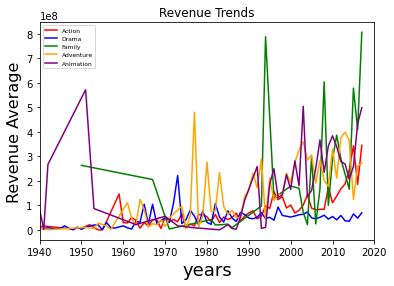

In [29]:
#revenue trends
action_revenue_year_df = clean_movie_data_df.loc[clean_movie_data_df['Primary Genre'] == 'Action'  ]
action_revenue_year_df = action_revenue_year_df[['release_year','revenue','Primary Genre']].groupby('release_year')
action_revenue_mean = action_revenue_year_df['revenue'].mean()


drama_revenue_year_df = clean_movie_data_df.loc[clean_movie_data_df['Primary Genre'] == 'Drama'  ]
drama_revenue_year_df = drama_revenue_year_df[['release_year','revenue','Primary Genre']].groupby('release_year')
drama_revenue_mean = drama_revenue_year_df['revenue'].mean()


family_revenue_year_df = clean_movie_data_df.loc[clean_movie_data_df['Primary Genre'] == 'Family'  ]
family_revenue_year_df = family_revenue_year_df[['release_year','revenue','Primary Genre']].groupby('release_year')
family_revenue_mean = family_revenue_year_df['revenue'].mean()

adventure_revenue_year_df = clean_movie_data_df.loc[clean_movie_data_df['Primary Genre'] == 'Adventure'  ]
adventure_revenue_year_df = adventure_revenue_year_df[['release_year','revenue','Primary Genre']].groupby('release_year')
adventure_revenue_mean = adventure_revenue_year_df['revenue'].mean()

animation_revenue_year_df = clean_movie_data_df.loc[clean_movie_data_df['Primary Genre'] == 'Animation'  ]
animation_revenue_year_df = animation_revenue_year_df[['release_year','revenue','Primary Genre']].groupby('release_year')
animation_revenue_mean = animation_revenue_year_df['revenue'].mean()

action_revenue_years = action_revenue_mean.keys()
drama_revenue_years = drama_revenue_mean.keys()
adventure_revenue_years = adventure_revenue_mean.keys()
family_revenue_years = family_revenue_mean.keys()
animation_revenue_years = animation_revenue_mean.keys()

action_handle,= plt.plot(action_revenue_years, action_revenue_mean, color="red", label="Action")
drama_handle,= plt.plot(drama_revenue_years, drama_revenue_mean, color="blue", label="Drama" )
family_handle,= plt.plot(family_revenue_years,family_revenue_mean, color="green", label="Family" )
adventure_handle,= plt.plot(adventure_revenue_years, adventure_revenue_mean, color="orange", label="Adventure" )
animation_handle,= plt.plot(animation_revenue_years, animation_revenue_mean, color="purple", label="Animation" )

plt.legend(handles=[action_handle, drama_handle, family_handle, adventure_handle,animation_handle], loc="upper left", fontsize=6)
plt.xlabel('years', fontsize=18)
plt.ylabel('Revenue Average', fontsize=16)
plt.title('Revenue Trends')
plt.xlim(1940, 2020) 

plt.show()



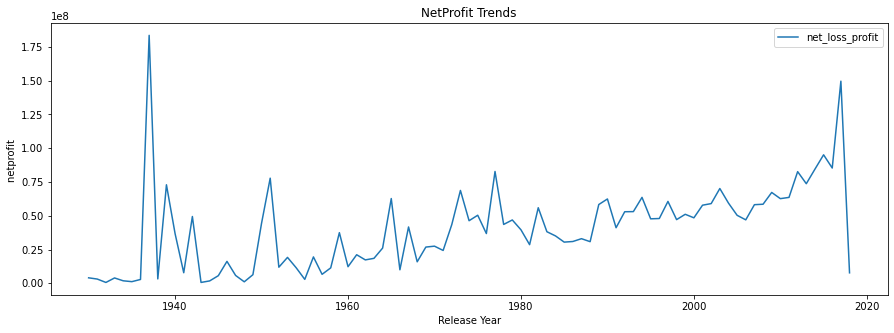

In [30]:
#netprofit trends
netprofit_year_df = clean_movie_data_df[['release_year','net_loss_profit']].groupby('release_year').mean()

netprofit_year_df.plot(figsize=(15,5))
plt.title("NetProfit Trends")
plt.xlabel("Release Year")
plt.ylabel("netprofit ")
plt.show()


### Chi Sq test changes

In [31]:
#determine the critical value
critical_value = stats.chi2.ppf(0.95 , 19)
critical_value

30.14352720564616

In [32]:
# get the original movie dataset genre and counts
orig_movie_data_df = movie_data_df.copy()
orig_movie_data_df['Primary_Genre']=[json.loads(row.genres.replace("'",'"'))[0]['name'] if row.genres != '[]' else '' for _,row in orig_movie_data_df.iterrows()]
orig_movie_data_df.replace("Odyssey Media", "", inplace = True)
orig_movie_data_df.replace("Aniplex", "", inplace = True)
orig_movie_data_df.replace("Carousel Productions", "", inplace = True)
orig_movie_data_df = orig_movie_data_df.loc[orig_movie_data_df['Primary_Genre']!= ""]

orig_movie_genre_counts = orig_movie_data_df['Primary_Genre'].value_counts().sort_index()
expected_genre_counts_df = pd.DataFrame(orig_movie_genre_counts)

expected_genre_counts_df['Primary_Genre'] = expected_genre_counts_df['Primary_Genre'] / original_movie_data_cnt

expected_genre_counts_df[1] = 2147 /  original_movie_data_cnt
expected_genre_counts_df.columns = ["expected" ,"exp_exp"]
#print(expected_genre_counts_df)


In [33]:
print(f'Critical Value: {stats.chi2.ppf(0.95 , 19)}')
print( f' chi square b/w cleaned data and original data: {stats.chisquare(observed_genre_counts_df["observed"], expected_genre_counts_df["expected"])}')


Critical Value: 30.14352720564616
 chi square b/w cleaned data and original data: Power_divergenceResult(statistic=2.5976944957972843, pvalue=0.9999967113941848)


In [34]:
#print( f' chi square b/w cleaned data and original data: {stats.chisquare(observed_genre_counts_df["Primary Genre"], expected_genre_counts_df["Primary_Genre"])}')

In [35]:
print( f' chi square b/w cleaned data and expected data: {stats.chisquare(observed_genre_counts_df["observed"], observed_genre_counts_df["obs_exp"])}')

 chi square b/w cleaned data and expected data: Power_divergenceResult(statistic=1.953651027374339, pvalue=0.9999997071007335)


In [36]:
print( f' chi square b/w original data and expected data: {stats.chisquare(expected_genre_counts_df["expected"], expected_genre_counts_df["exp_exp"])}')

 chi square b/w original data and expected data: Power_divergenceResult(statistic=1.843785974540028, pvalue=0.9999998224478909)
